<a href="https://colab.research.google.com/github/sid-betalol/HS4007-Computational-Economics-And-Public-Policy/blob/main/Assignment_Hawk_Dove_Game_Simulation_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hawk-Dove Game Simulation Visualizer**

Here we simulate the evolution of aggression in two populations competing against each other for a limited resource. We will be simulationg X agents over N generations.

**Agents:** Each agent belongs to one of the two populations and each population follows a specific game theory strategy.

**Food**: Food comes in pairs, so each food can hold up to two agents.

The simulation is run over N **generations**.

## **Idea**
1.   Each agent goes to a random location.
2.   The food (resource) is shared according to the agent's strategy.
3.   The agent survives, dies or reproduces depending on the food quantity consumed in each iteration.

## **Workflow**
1. Each agent is assigned to a food randomly.
2. By competing the agents against each other, we decide how much food each agent receives.
3. In each iteration of simulation:
*   Each location has two pieces of food.
*   Consumption of a single piece of food leads to surival of the agent.
*   Consumption of a two pieces of food leads to reproduction of the agent.
*   No consumption of food leads to the death of the agent.
4. We determine if the agent dies, survives or reproduces based on the aforementioned conditions.

Using this idea we can construct a payoff matrix

## **Payoff Matrix**
 Agent1/Agent2 | Dove  | Hawk
 ------------ | -------  | -----------
 Dove      |  1, 1  |  0.5, 1.5
 Hawk  |   1.5, 0.5  |  0, 0

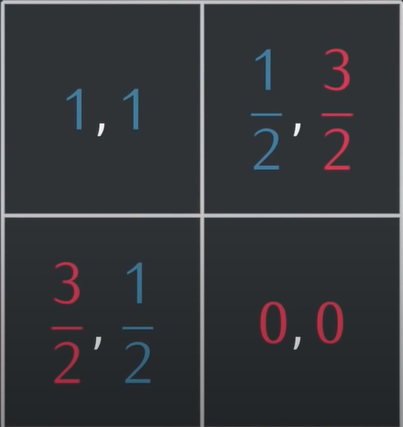


Agents die, live or reproduce based on the amount of fodd they consume:
1. No food -> death
2. 0.5 food -> 50% chance of survival
3. 1 food -> 100% chance of survival
4. 1.5 fo0ds -> 100% chance of survival and 50% chance of reproduction
5. 2 foods -> 100% chance of survival and 100% chance of reproduction

## **Available Strategies**
I have modelled the following strategies:
1. Dove (always cooperate)
2. Hawk (always defect)
3. TitForTat (cooperate on first round, then imitate opponent's last move)
4. AngryTitForTat (defect on first move, then imitate opponent's last move)
5. Random (50% chance to cooperate)
6. RandomDove (80% chance to cooperate)
7. RandomHawk (20% chance to cooperate)
8. Grim (cooperates until opponent defects, then always defects)
9. TitForTwoTats (if opponent defects twice in a row, then defect.  Otherwise cooperate)

## *References*

This problem statement has been inspired by the [Primer YouTube](https://www.youtube.com/c/PrimerLearning) channel's video on: [Simulating the Evolution of Aggression](https://youtu.be/YNMkADpvO4w).

1. [Computational Economics and Public Policy Course' Notes, slides, notebooks and reading material](https://drive.google.com/drive/u/1/folders/1UsPR2q98UtyxA8xYAjnhJw_amdfVlknZokTaW2V1OJ_AiBI228qqNxIqZSNo2Wh3jUrzWmqV)
2. Investopdeia and Wikipedia for differnt game theory strategies
3. Primer YouTube channel for ideas
4. [argparse documentation](https://docs.python.org/3/library/argparse.html)
5. [Histograms documentation](https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/)

### Imports

In [ ]:
import argparse
import random
import copy
import sys
import numpy as np
import matplotlib.pyplot as plt

### Agent Class
  Agents are the main actors in this program.  Each is assigned a strategy
  when initiated.  When running the simulation, each agent is assigned to a
  food location, and then is assigned a food value.

In [ ]:
class Agent:
    food = 0
    food_location = None
    strategy = None

    def assign_food(self, food_number):
        self.food_location = food_number

    def __init__(self, strategy):
        self.strategy = strategy

    def first_move(self):
        if (self.strategy == "Dove"):
            return 1
        elif (self.strategy == "Hawk"):
            return 0
        elif (self.strategy == "Random"):
            return random.randint(0, 1)
        elif (self.strategy == "Randomdove"):
            if (random.random() > 0.8):
                return 0
            else:
                return 1
        elif (self.strategy == "Randomhawk"):
            if (random.random() > 0.2):
                return 0
            else:
                return 1
        elif (self.strategy == "Titfortat"):
            return 1
        elif (self.strategy == "Angrytitfortat"):
            return 0
        elif (self.strategy == "Grim"):
            return 1
        elif (self.strategy == "Titfortwotats"):
            return 1

    def get_next_move(self, move_history, opponent_move_history):
        if (self.strategy == "Dove"):
            return 1
        elif (self.strategy == "Hawk"):
            return 0
        elif (self.strategy == "Random"):
            return random.randint(0, 1)
        elif (self.strategy == "Randomdove"):
            if (random.random() > 0.8):
                return 0
            else:
                return 1
        elif (self.strategy == "Randomhawk"):
            if (random.random() > 0.2):
                return 0
            else:
                return 1
        elif (self.strategy == "Titfortat"):
            return (opponent_move_history[len(opponent_move_history) - 1])
        elif (self.strategy == "Angrytitfortat"):
            return (opponent_move_history[len(opponent_move_history) - 1])
        elif (self.strategy == "Grim"):
            has_opponent_defected = 1
            for i in range(len(opponent_move_history)):
                if (opponent_move_history[i] == 0):
                    has_opponent_defected = 0
            return has_opponent_defected
        elif (self.strategy == "Titfortwotats"):
            if (((opponent_move_history[
                len(opponent_move_history) - 1]) == 0) and (
                    len(opponent_move_history) > 1)):
                if ((
                        opponent_move_history[
                            len(opponent_move_history) - 2]) == 0):
                    return 0
            return 1

### Food Class
Food is the resource in this simulation.  Food is assigned to agents,
and then agents die, survive, or reproduce depending on their food value.

In [ ]:
class Food:
    Agent1 = None
    Agent2 = None

    def number_of_agents(self):
        # return the number of agents connected to this food
        if (self.Agent1 == None and self.Agent2 == None):
            return 0
        elif (self.Agent1 == None or self.Agent2 == None):
            return 1
        return 2

    def reset(self):
        # clears all agents connected to this food
        self.Agent1 = None
        self.Agent2 = None

    def add_agent(self, Agent):
        if (self.Agent1 == None):
            # set agent in first slot
            self.Agent1 = Agent
        elif (self.Agent2 == None):
            # set agent in second slot
            self.Agent2 = Agent
        else:
            # returns false if no room for an agent
            return False
            # returns true if food has room for an agent
        return True

### Helper Functions

Function to ask the user for input to set up simulation

In [ ]:
def get_commandline_input():
    number_of_agent1 = int(input("Enter number of first population: "))
    number_of_agent2 = int(input("Enter number of second population: "))
    temp = 0
    help = input("Would you like to see the available strategies? (Y/N): ")
    # while loop checking if user wants to see available strategies
    while (temp == 0):
        if help == 'Y' or help == 'y':
            print_available_strategies()
            temp = 1
        elif help == 'N' or help == 'n':
            break
        else:
            help = input("Invalid Input - Please enter 'Y' or 'N': ")
    agent1_strategy = input("Enter the strategy for the first agent: ").lower()
    agent2_strategy = input("Enter the strategy for the second agent: ").lower()
    agent1_strategy = agent1_strategy.capitalize()
    agent2_strategy = agent2_strategy.capitalize()

    food_amount = int(input("Enter the number of available food: "))
    # check that the food input is enough to hold the initial agent population
    while (food_amount < (number_of_agent1 + number_of_agent2) / 2):
        print("Food amount must be greater than half of the total number of agents" )
        food_amount = int(input("Enter the number of available food: "))
    number_of_generations = int(input("Enter the number of generations: "))
    return [number_of_agent1, number_of_agent2, agent1_strategy,
            agent2_strategy, food_amount, number_of_generations]

The following function prints a list of the available strategies

In [ ]:
def print_available_strategies():
    print("Available strategies:")
    print("Dove (always cooperate)")
    print("Hawk (always defect)")
    print("TitForTat (cooperate on first round, then imitate opponent's last move)")
    print("AngryTitForTat (defect on first move, then imitate opponent's last move)")
    print("Random (50% chance to cooperate)")
    print("RandomDove (80% chance to cooperate)")
    print("RandomHawk (20% chance to cooperate)")
    print("Grim (cooperates until opponent defects, then always defects)")
    print("TitForTwoTats (if opponent defects twice in a row, then defect. Otherwise cooperate)")

### Functions for simulating

Agents are assigned to a random food location.

If a food location already has 2 agents assigned to it, no more agents can be attached to that flocation, so the agent will be assigned to a new location.

In [ ]:
def assign_agents_to_food(agentList, food_amount):
    foodList = []
    # create foodList
    for i in range(food_amount):
        foodList.append(Food())

    i = 0
    while (i < len(agentList)):
        # picking random food
        random_food = random.randint(0, (food_amount - 1))
        # checking if food already has an agent
        if (foodList[random_food].number_of_agents() < 2):
            foodList[random_food].add_agent(agentList[i])
            i = i + 1

    # temporary agent list
    tempList = []

    # loop for assigning agents food
    for i in range(len(foodList)):
        # if food has agent
        if (foodList[i].number_of_agents() == 1):
            foodList[i].Agent1.assign_food(i)
            tempList.append(foodList[i].Agent1)
        elif (foodList[i].number_of_agents() == 2):
            foodList[i].Agent1.assign_food(i)
            tempList.append(foodList[i].Agent1)
            foodList[i].Agent2.assign_food(i)
            tempList.append(foodList[i].Agent2)
    return tempList

To ensure competition between the agents at a location for food. If the location is assigned just one agent, then it can take up both the food items.

In [ ]:
def compete_for_food(agentList):
    for i in range(len(agentList)):
        compete = 0
        for j in range(len(agentList)):
            if (agentList[i].food_location == agentList[
                j].food_location and i != j):
                [agentList[i].food, agentList[j].food] = simulate_strategies(
                    agentList[i], agentList[j])
                compete = 1
                break
        if (compete == 0):
            agentList[i].food = 2
    return agentList

The following function ensures that the game theory strategy assigned to each type of population is applied for each iteration as given by the user.

In [ ]:
def simulate_strategies(agent1, agent2):
    # initiate move history lists
    number_of_iterations = 40
    agent1_moves = []
    agent2_moves = []
    # get each agents first move
    agent1_moves.append(agent1.first_move)
    agent2_moves.append(agent2.first_move)
    # agents compete
    for i in range(number_of_iterations - 1):
        agent1_moves.append(agent1.get_next_move(agent1_moves, agent2_moves))
        agent2_moves.append(agent2.get_next_move(agent2_moves, agent1_moves))

    # assign payout
    agent1_payout = 0
    agent2_payout = 0
    # payout matrix
    cooperate_payout = 1 / number_of_iterations
    winner_payout = 1.5 / number_of_iterations
    loser_payout = .5 / number_of_iterations
    defect_payout = 0 / number_of_iterations
    for i in range(number_of_iterations):
        # compare agent1_moves[i] and agent2_moves[i]
        if (agent1_moves[i] == 1 and agent2_moves[i] == 1):
            agent1_payout += cooperate_payout
            agent2_payout += cooperate_payout
        elif (agent1_moves[i] == 1 and agent2_moves[i] == 0):
            agent1_payout += loser_payout
            agent2_payout += winner_payout
        elif (agent1_moves[i] == 0 and agent2_moves[i] == 1):
            agent1_payout += winner_payout
            agent2_payout += loser_payout
        elif (agent1_moves[i] == 0 and agent2_moves[i] == 0):
            agent1_payout += defect_payout
            agent2_payout += defect_payout
    return [agent1_payout, agent2_payout]

The following function iterates through the list of agents and checks the amount of food they have after an iteration
1.    if food = 1 then no change
2.    if food < 1 then the agent has chance of dying
3.    if food > 1 then the agent has chance of reproducing

After each iteration, it resets each agent's food store back to 0

In [ ]:
def advance_generation(agentList):
    tempList = []
    for i in range(len(agentList)):
        if (agentList[i].food < 1):
            if (random.random() < agentList[i].food):
                # agent survives
                tempList.append(agentList[i])
        elif (agentList[i].food > 1):
            tempList.append(agentList[i])
            if (random.random() < (agentList[i].food - 1)):
                # agent reproduces
                newAgent = copy.deepcopy(agentList[i])
                tempList.append(newAgent)
        elif (agentList[i].food == 1):
            tempList.append(agentList[i])
    # reset agent's food to 0
    for i in range(len(tempList)):
        tempList[i].food = 0

    return tempList

The following function iterates through the list of agents and returns lists containing two elements: the population peratining to each strategy

In [ ]:
def save_statistics(agentList, agent1_strategy, agent2_strategy):
    strategy1_population = 0
    strategy2_population = 0
    for i in range(len(agentList)):
        if (agentList[i].strategy == agent1_strategy):
            strategy1_population = strategy1_population + 1
        elif (agentList[i].strategy == agent2_strategy):
            strategy2_population = strategy2_population + 1
    return [strategy1_population, strategy2_population]

Test Function which prints out the details of each agent

In [ ]:
def print_agents(agentList):
    for i in range(len(agentList)):
        print("Agent List #" + str(i) + " Agent Food: " + str(
            agentList[i].food) + " Agent Strategy: " + agentList[
                  i].strategy + " Food Location: " + str(
            agentList[i].food_location))

Function to plot the results as a histogram of populations over time

In [ ]:
def histogram_graph(number_of_agent1, number_of_agent2, agent1_strategy, agent2_strategy, food_amount, strategy1_population, strategy2_population, number_of_generations):
    generations = []
    for i in range(number_of_generations + 1):
        generations.append(i + 1)

    # Get values from the group and categories
    generation_amount = []
    for i in range(number_of_generations + 1):
        generation_amount.append(i)

    # The position of the bars on the x-axis
    r = range(len(generation_amount))
    barWidth = 1
    # plot bars
    plt.figure(figsize=(25, 18))
    ax1 = plt.bar(r, strategy1_population, color='#003f5c', edgecolor='white',
                  width=barWidth, label=agent1_strategy)
    ax2 = plt.bar(r, strategy2_population,
                  bottom=np.array(strategy1_population), color='#ff6361',
                  edgecolor='white',
                  width=barWidth, label=agent2_strategy)

    plt.legend()
    # Custom X axis
    plt.xticks(r, generation_amount, fontweight='bold')
    plt.ylabel("Population Size")
    plt.xlabel("Generations")
    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1,
                 ha="center", va="center", color="black",
                 fontsize=10, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2,
                 ha="center", va="center", color="black",
                 fontsize=10, fontweight="bold")
    plt.savefig(str(number_of_agent1) + agent1_strategy + "VS" + str(
        number_of_agent2) + agent2_strategy + str(
        food_amount) + "Food" + str(number_of_generations) + "Gens")
    plt.show()

Function to run the simulation and return results

In [ ]:
def run_simulation(number_of_agent1, number_of_agent2, agent1_strategy, agent2_strategy, food_amount, number_of_generations):
  agentList = []

  # populate agentList
  for i in range(number_of_agent1 + number_of_agent2):
      if (i < number_of_agent1):
          agentList.append(Agent(agent1_strategy))
      else:
          agentList.append(Agent(agent2_strategy))

  # create lists to store graphing information
  strategy1_population = [0] * (number_of_generations + 1)
  strategy2_population = [0] * (number_of_generations + 1)

  # main loop
  for generation in range(number_of_generations):
      # assign each agent to a random food
      agentList = assign_agents_to_food(agentList, food_amount)

      # agents compete for food
      agentList = compete_for_food(agentList)

      # agents reproduce and die
      agentList = advance_generation(agentList)

      # prepare stats for graphing purposes
      strategy1_population[0] = number_of_agent1
      strategy2_population[0] = number_of_agent2
      [strategy1_population[generation + 1],
      strategy2_population[generation + 1]] = save_statistics(agentList, agent1_strategy, agent2_strategy)

  # print histogram graph
  histogram_graph(number_of_agent1, number_of_agent2, agent1_strategy, agent2_strategy, food_amount, strategy1_population, strategy2_population, number_of_generations)

# How to run the program?
1. Invoke the `get_commandline_input()` function and store the input in a variable (say input1)
2. When one invokes the `get_commandline_input()` function, they are asked the following things:

* The strength of population-1
* The strength of population-2
* Whether or not the user would like to view the available strategies (Y/N)
* Strategy for agents in the first population
* Strategy for agents in the second population
* Number of available food (resources)
* Number of generations over which the simulation should be run

3. After this the input1 needs to be split and all its elements need to be stored as separate variables.
4. These 6 variables are the inputs to the run_simulation function, which upon running returns the results.

### **Test Case-1**

Population-1: 75

Population-2: 100

Strategy of Agents in Population-1: Hawk

Strategy of Agents in Population-2: Dove

Number of locations with food: 100

Generations: 15

In [ ]:
input1 = get_commandline_input()

Enter number of first population: 75
Enter number of second population: 100
Would you like to see the available strategies? (Y/N): Y
Available strategies:
Dove (always cooperate)
Hawk (always defect)
TitForTat (cooperate on first round, then imitate opponent's last move)
AngryTitForTat (defect on first move, then imitate opponent's last move)
Random (50% chance to cooperate)
RandomDove (80% chance to cooperate)
RandomHawk (20% chance to cooperate)
Grim (cooperates until opponent defects, then always defects)
TitForTwoTats (if opponent defects twice in a row, then defect. Otherwise cooperate)
Enter the strategy for the first agent: Hawk
Enter the strategy for the second agent: Dove
Enter the number of available food: 100
Enter the number of generations: 15


In [ ]:
#print(input1)

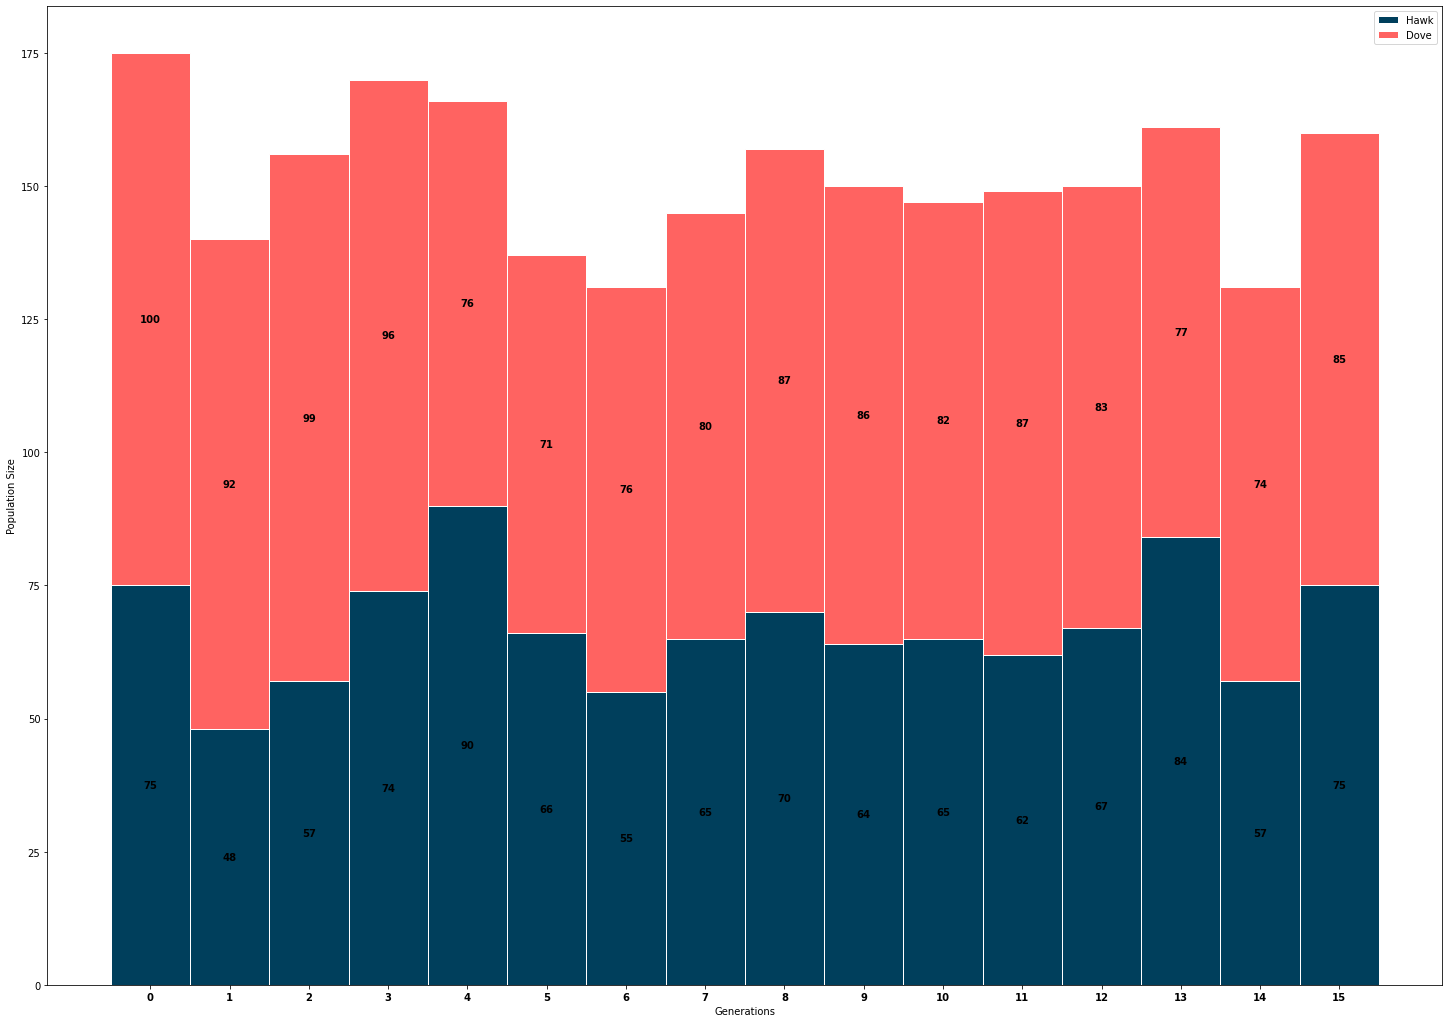

In [ ]:
a,b,c,d,e,f = input1
run_simulation(a,b,c,d,e,f)

### **Test Case-2: Only Doves with surplus food**


In [ ]:
input2 = get_commandline_input()

Enter number of first population: 10
Enter number of second population: 10
Would you like to see the available strategies? (Y/N): N
Enter the strategy for the first agent: Dove
Enter the strategy for the second agent: Dove
Enter the number of available food: 60
Enter the number of generations: 20


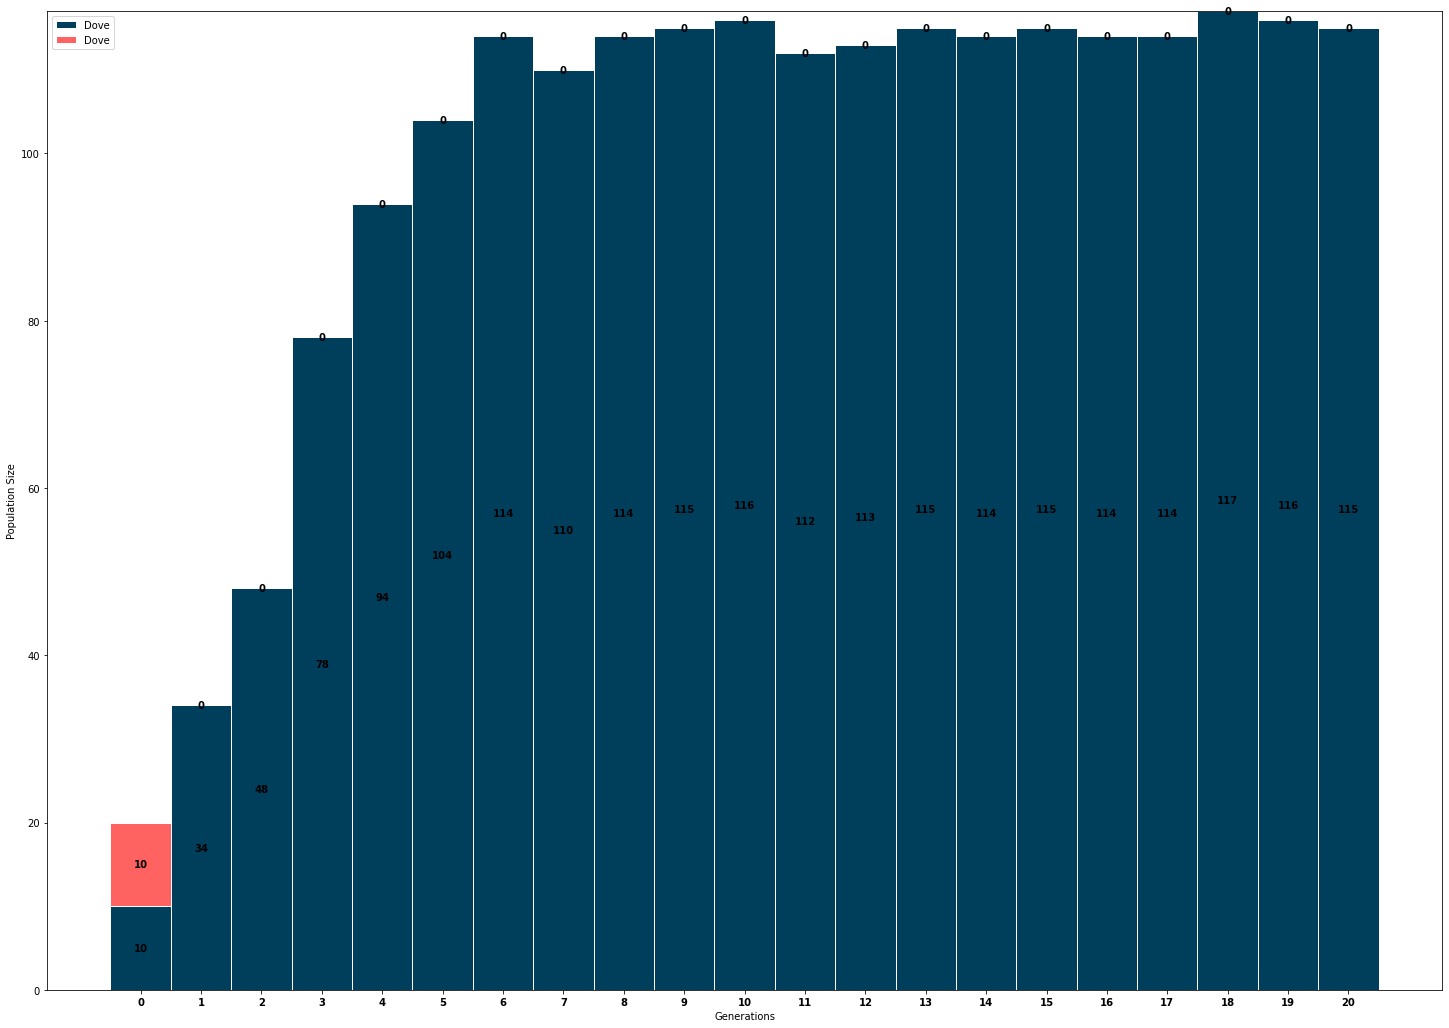

In [ ]:
run_simulation(input2[0], input2[1], input2[2], input2[3], input2[4], input2[5])

Maximum number of doves that can survive with 60 foods are 120.

It can be seen that only after a few generations the total population hovers close to 120, which is as expected in the dove population. Here the doves are able to reproduce as there are a lot of food locations in comaprison to number of doves, ensuring that they don't run into each other.

### Test-Case 3: Only Doves with limited food

In [ ]:
input3 = get_commandline_input()

Enter number of first population: 10
Enter number of second population: 10
Would you like to see the available strategies? (Y/N): N
Enter the strategy for the first agent: Dove
Enter the strategy for the second agent: Dove
Enter the number of available food: 10
Enter the number of generations: 20


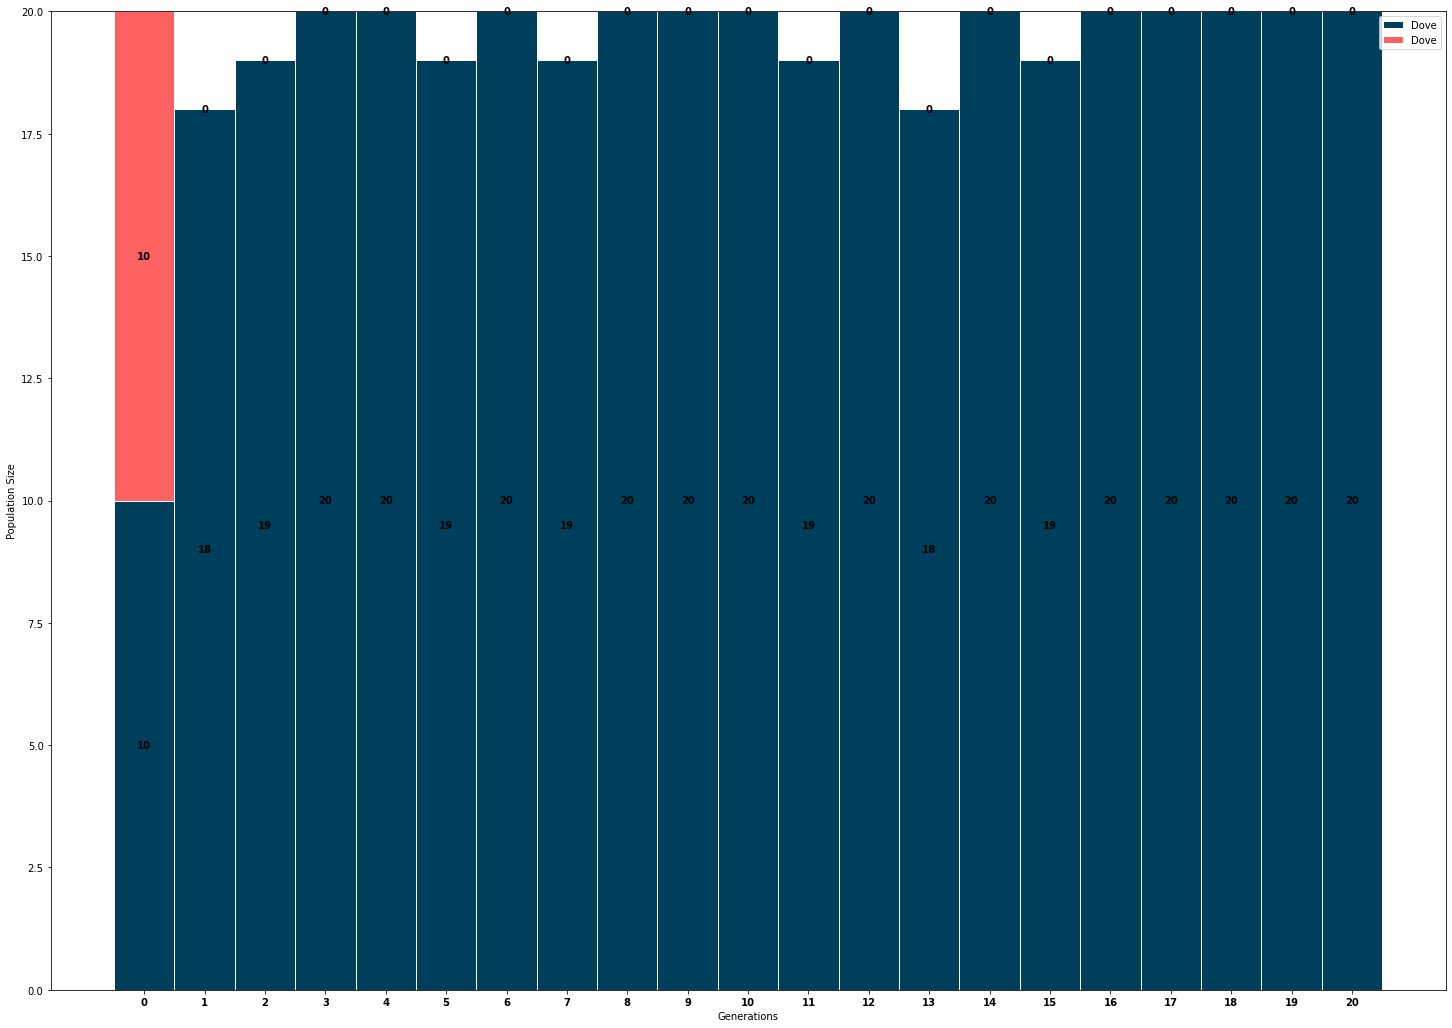

In [ ]:
run_simulation(input3[0], input3[1], input3[2], input3[3], input3[4], input3[5])

With 10 locations that have food, 20 pieces of food are available. And it can be seen that after a few generations also, 20 doves are alive in most cases. However, reproduction is scarce in this scenario as two doves are mapped to one food location in most cases.

### **Test Case-4 : Only Hawks with Surplus food**

In [ ]:
input4 = get_commandline_input()

Enter number of first population: 10
Enter number of second population: 10
Would you like to see the available strategies? (Y/N): N
Enter the strategy for the first agent: Hawk
Enter the strategy for the second agent: Hawk
Enter the number of available food: 60
Enter the number of generations: 20


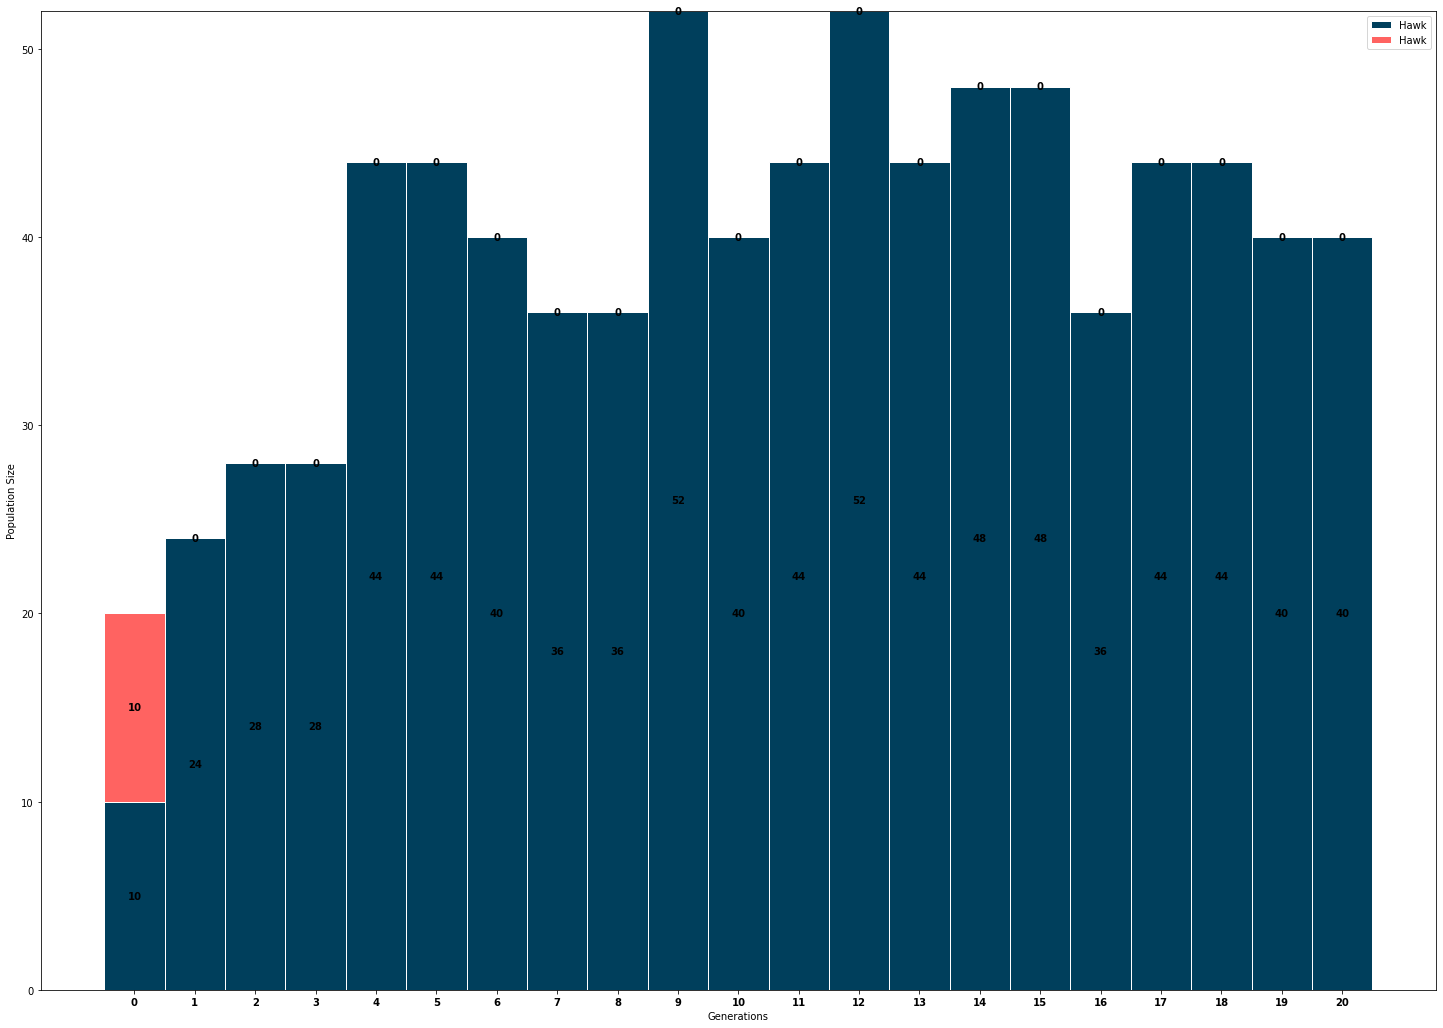

In [ ]:
run_simulation(input4[0], input4[1], input4[2], input4[3], input4[4], input4[5])

As Hawks have a competitive mindset, the population amongst themselves does not flourish like in the case of Doves.

### **Test Case-5 : Only Hawks with limited food**

In [ ]:
input5 = get_commandline_input()

Enter number of first population: 10
Enter number of second population: 10
Would you like to see the available strategies? (Y/N): N
Enter the strategy for the first agent: Hawk
Enter the strategy for the second agent: Hawk
Enter the number of available food: 15
Enter the number of generations: 20


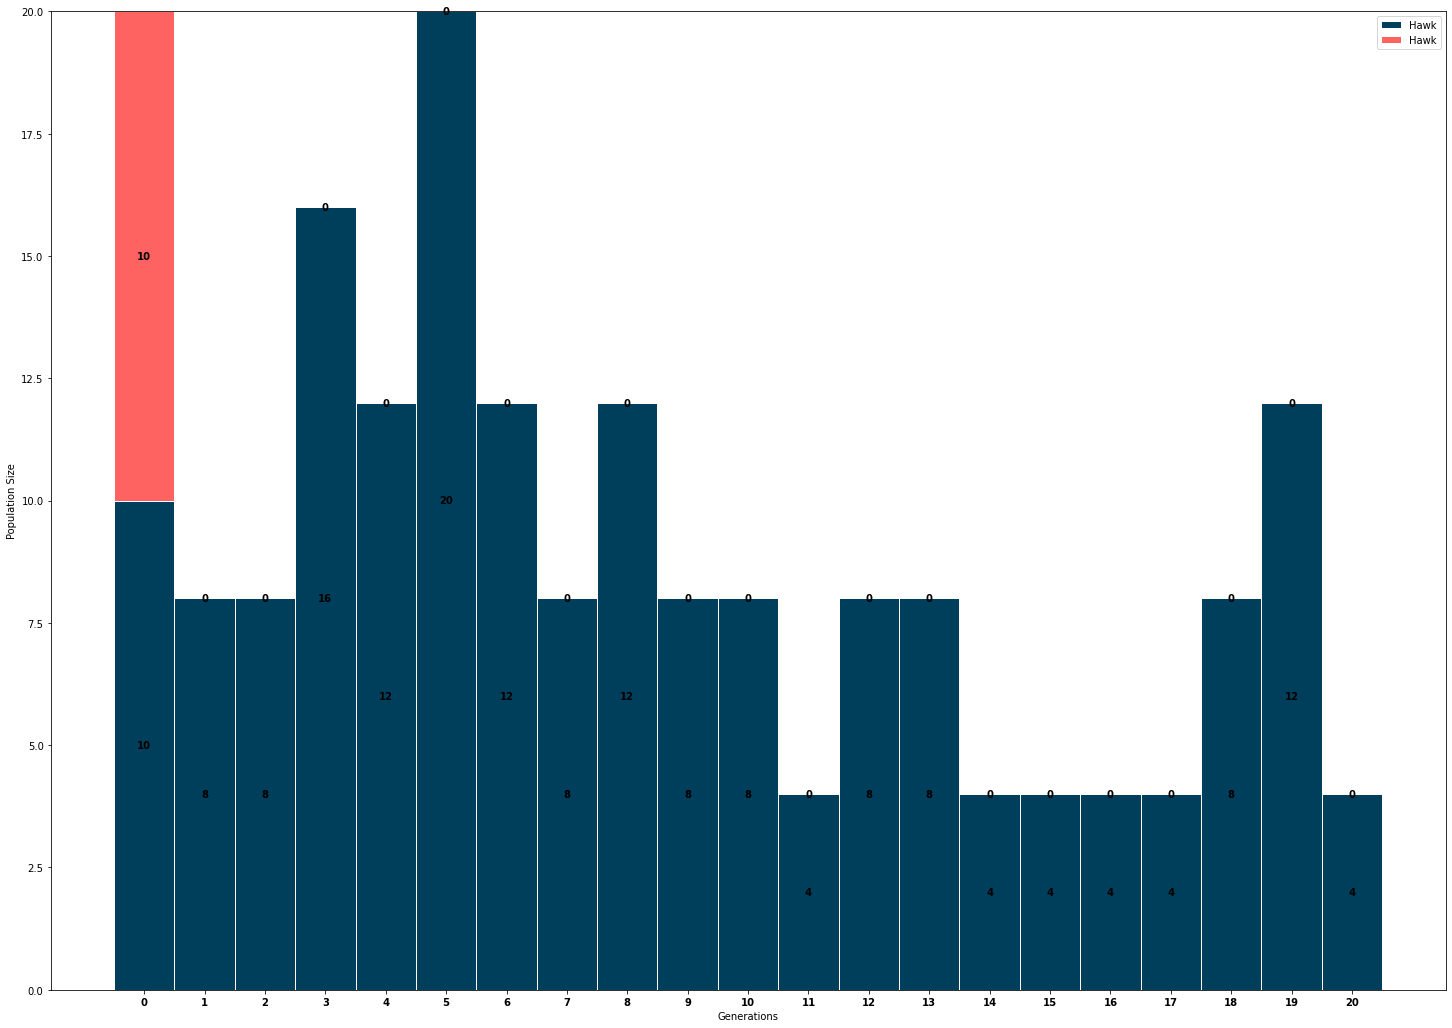

In [ ]:
run_simulation(input5[0], input5[1], input5[2], input5[3], input5[4], input5[5])

As it can be seen, amongst the Hawks, the population starts to dwindle in a few generations with a lack of surplus food.

### **Test Case-6 : One Hawk v/s Doves**

In [ ]:
input6 = get_commandline_input()

Enter number of first population: 1
Enter number of second population: 19
Would you like to see the available strategies? (Y/N): N
Enter the strategy for the first agent: Hawk
Enter the strategy for the second agent: Dove
Enter the number of available food: 10
Enter the number of generations: 20


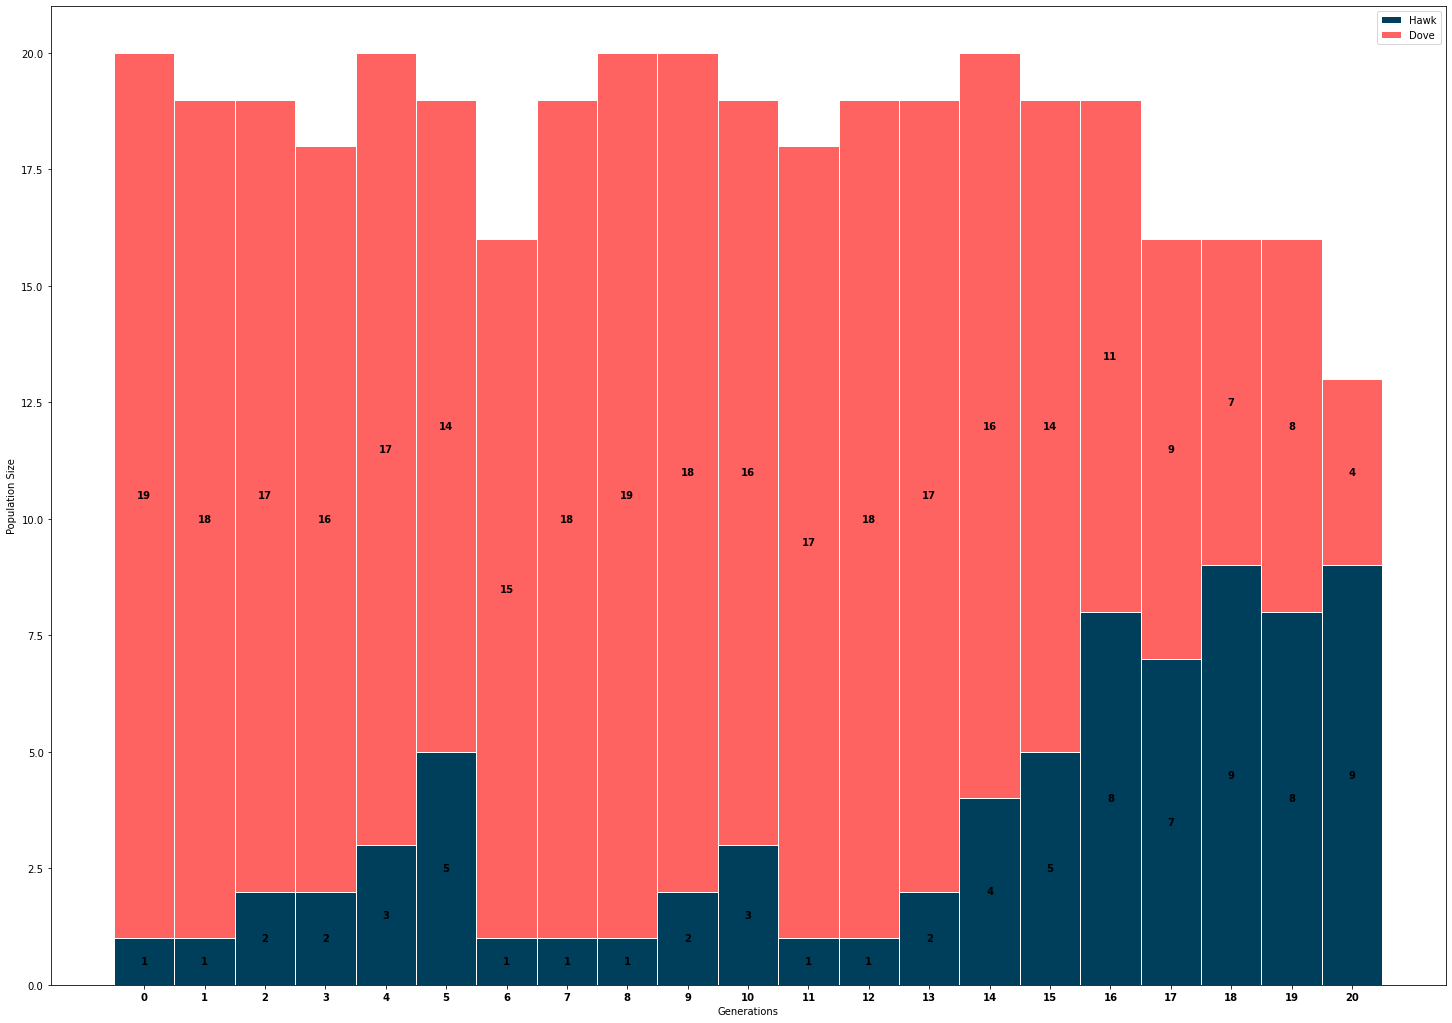

In [ ]:
run_simulation(input6[0], input6[1], input6[2], input6[3], input6[4], input6[5])

As it can be seen, the hawk population increases with time as they have an advantage over doves.

### **Test Case-7 : Equal Number of Doves and Hawks with surplus food**

In [ ]:
input7 = get_commandline_input()

Enter number of first population: 20
Enter number of second population: 20
Would you like to see the available strategies? (Y/N): N
Enter the strategy for the first agent: Hawk
Enter the strategy for the second agent: Dove
Enter the number of available food: 60
Enter the number of generations: 20


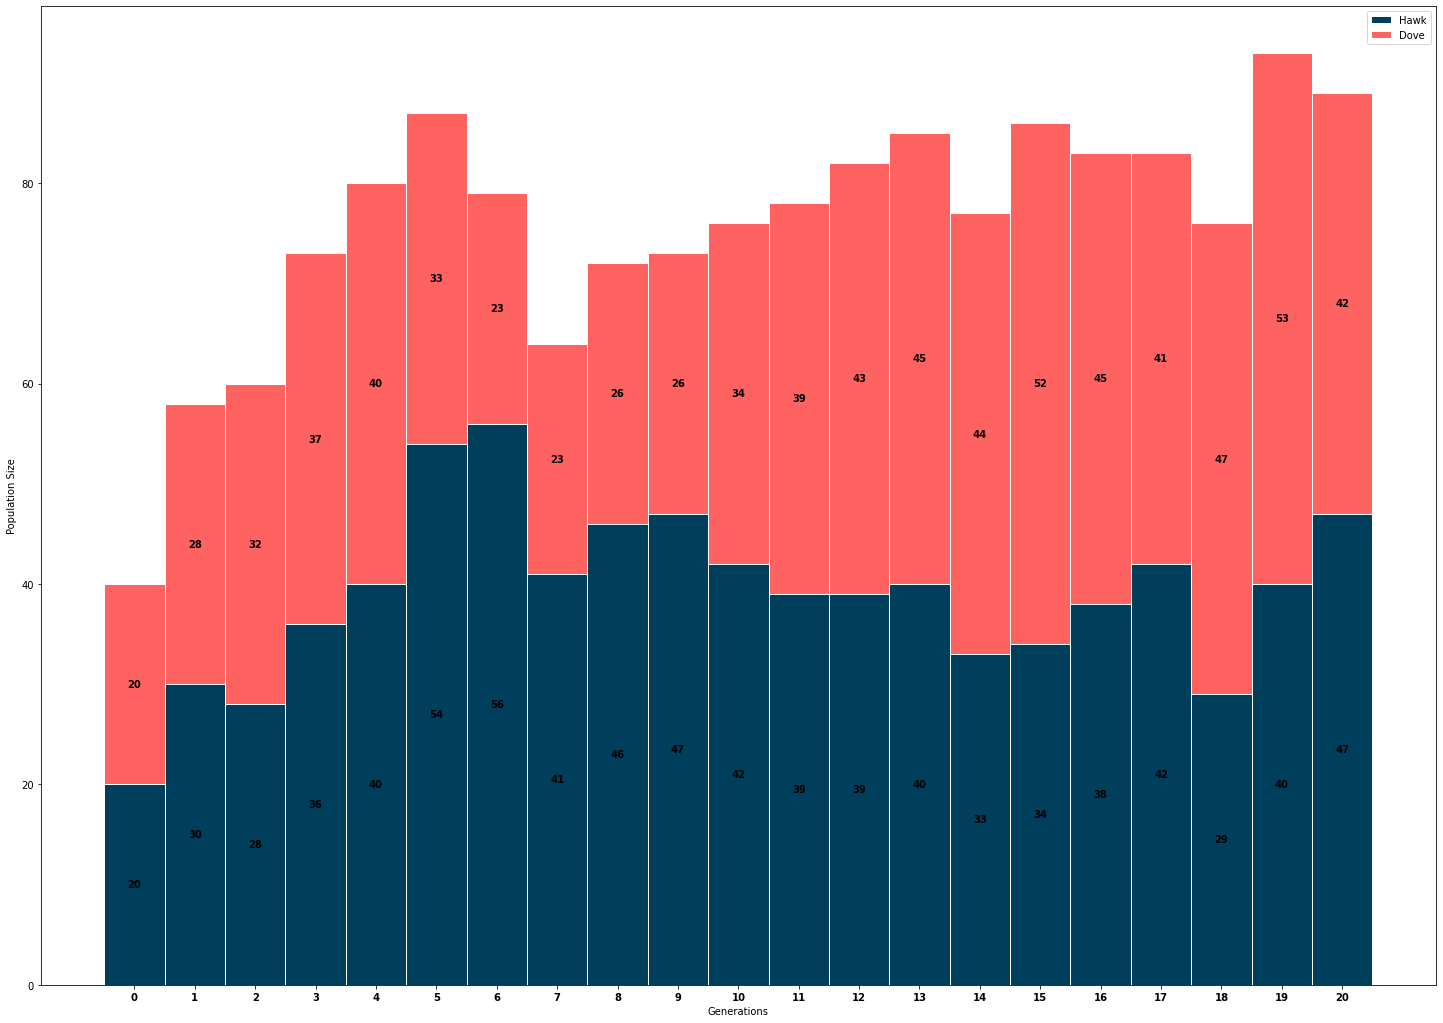

In [ ]:
run_simulation(input7[0], input7[1], input7[2], input7[3], input7[4], input7[5])

### **Test Case-8 : Equal Number of Doves and Hawks with limited food**

In [ ]:
input8 = get_commandline_input()

Enter number of first population: 20
Enter number of second population: 20
Would you like to see the available strategies? (Y/N): N
Enter the strategy for the first agent: Hawk
Enter the strategy for the second agent: Dove
Enter the number of available food: 20
Enter the number of generations: 20


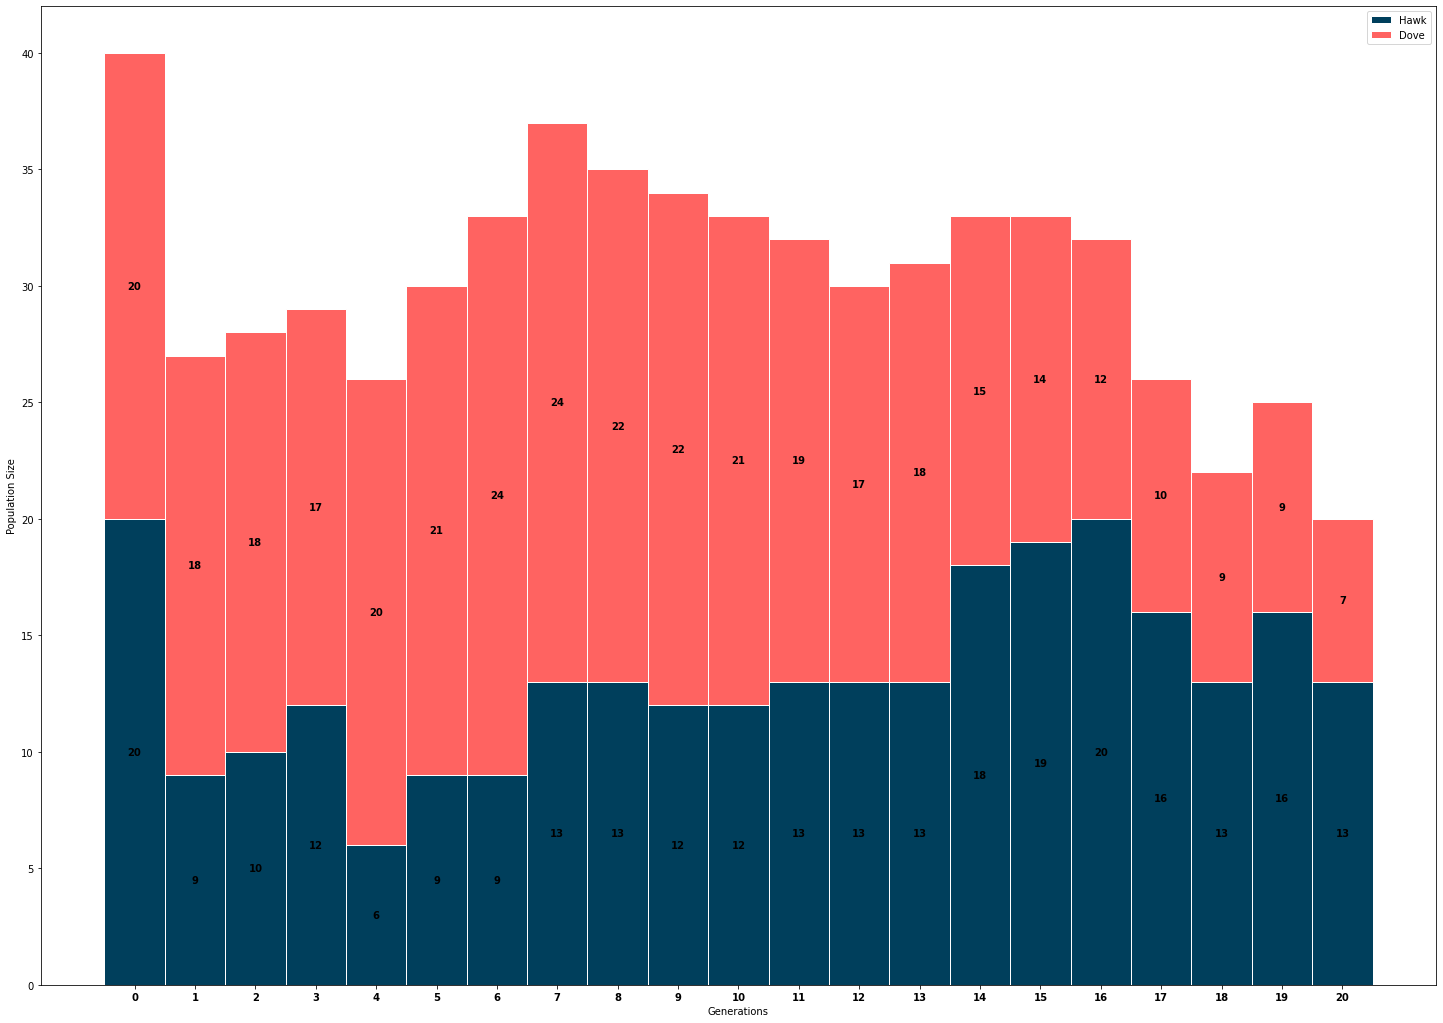

In [ ]:
run_simulation(input8[0], input8[1], input8[2], input8[3], input8[4], input8[5])

In case-7, there is a lot of food. So when doves/hawks are at a location alone, they are able reproduce. Even when doves are competing, they choose to share,hence, the population does not dwindle.

In case-8, due to the scarcity of resources, doves and hawks go head on, and obviously we see a stage when the the hawk population dominates. However, eventually, hawks start competing against each other for food at common locations leading to a decrease in population.

### **Test Case-9 : Randomdove v/s Grim**

In [ ]:
input9 = get_commandline_input()

Enter number of first population: 20
Enter number of second population: 20
Would you like to see the available strategies? (Y/N): N
Enter the strategy for the first agent: Randomdove
Enter the strategy for the second agent: Grim
Enter the number of available food: 60
Enter the number of generations: 20


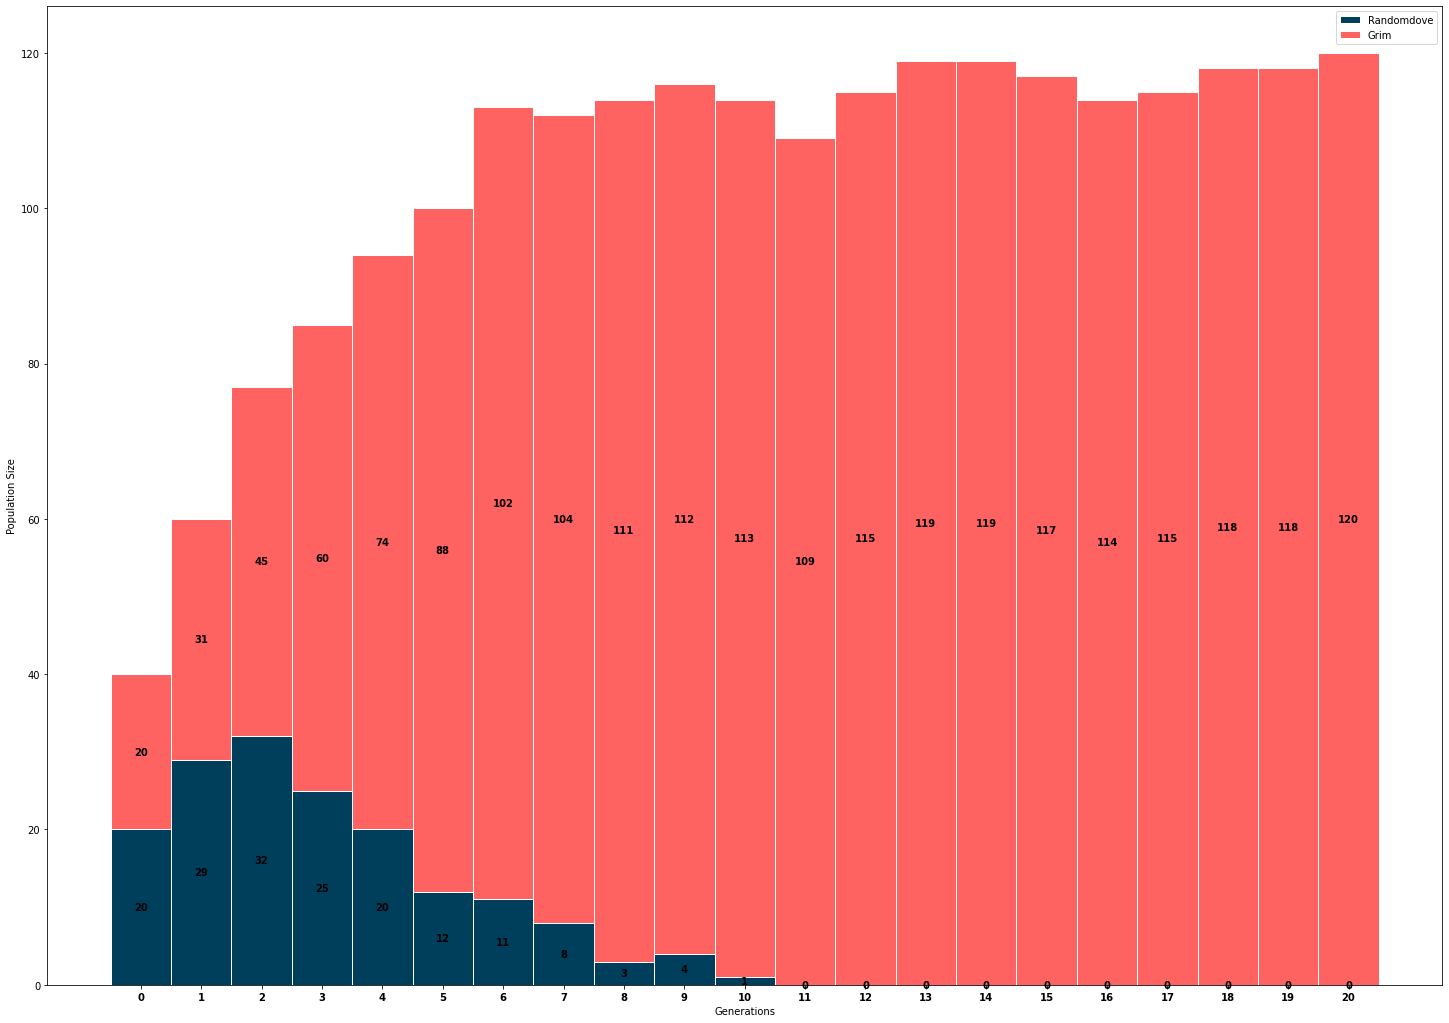

In [ ]:
run_simulation(input9[0], input9[1], input9[2], input9[3], input9[4], input9[5])

Everytime an agent from the Grim population is betrayed (defected against), it turns sour. Randomdove population cooperates with a probability of 80%. The betrayal (defecting) by the reamining 20% leads to their extinction. Makes one think.

### **Test Case 10: Randomhawk v/s Titfortwotats**

In [ ]:
input10 = get_commandline_input()

Enter number of first population: 20
Enter number of second population: 20
Would you like to see the available strategies? (Y/N): N
Enter the strategy for the first agent: Randomhawk
Enter the strategy for the second agent: Titfortwotats
Enter the number of available food: 60
Enter the number of generations: 20


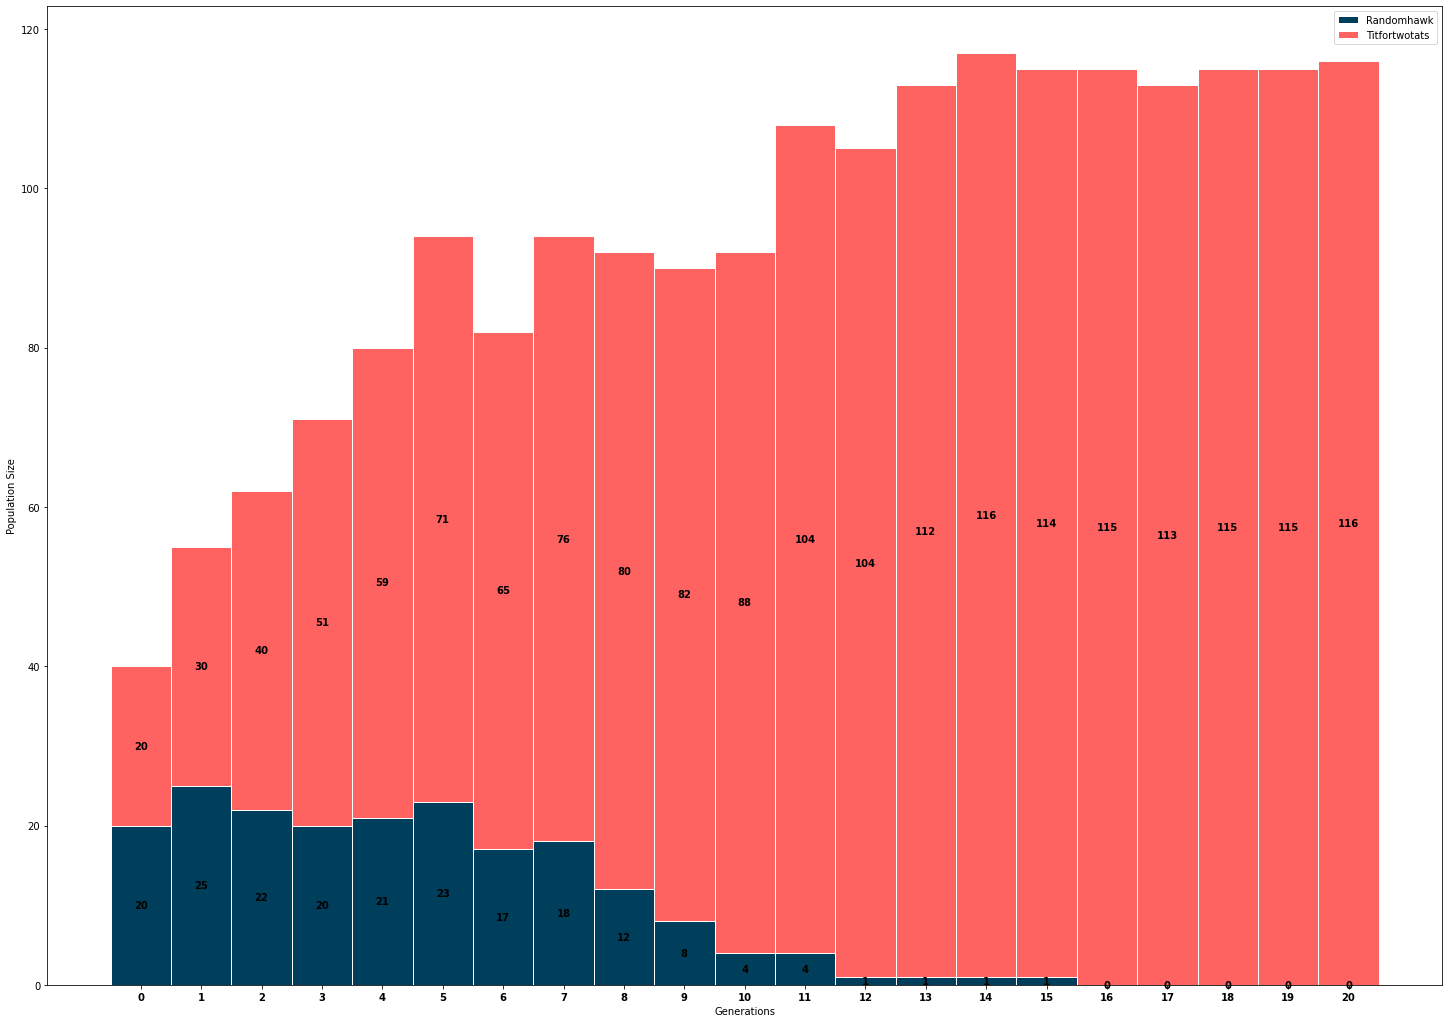

In [ ]:
run_simulation(input10[0], input10[1], input10[2], input10[3], input10[4], input10[5])

The Titfortwotats population cooperates until the opposing population defects twice in a row. So it doesn't give more than two chances, and acocrdinly, its population increases over time against Randomhawk. The situation will be opposite against Randomdoves as the next case will show.

### **Test Case-11: Randomdove v/s Titfortat**

In [ ]:
input11 = get_commandline_input()

Enter number of first population: 20
Enter number of second population: 20
Would you like to see the available strategies? (Y/N): N
Enter the strategy for the first agent: Randomdove
Enter the strategy for the second agent: Titfortat
Enter the number of available food: 60
Enter the number of generations: 20


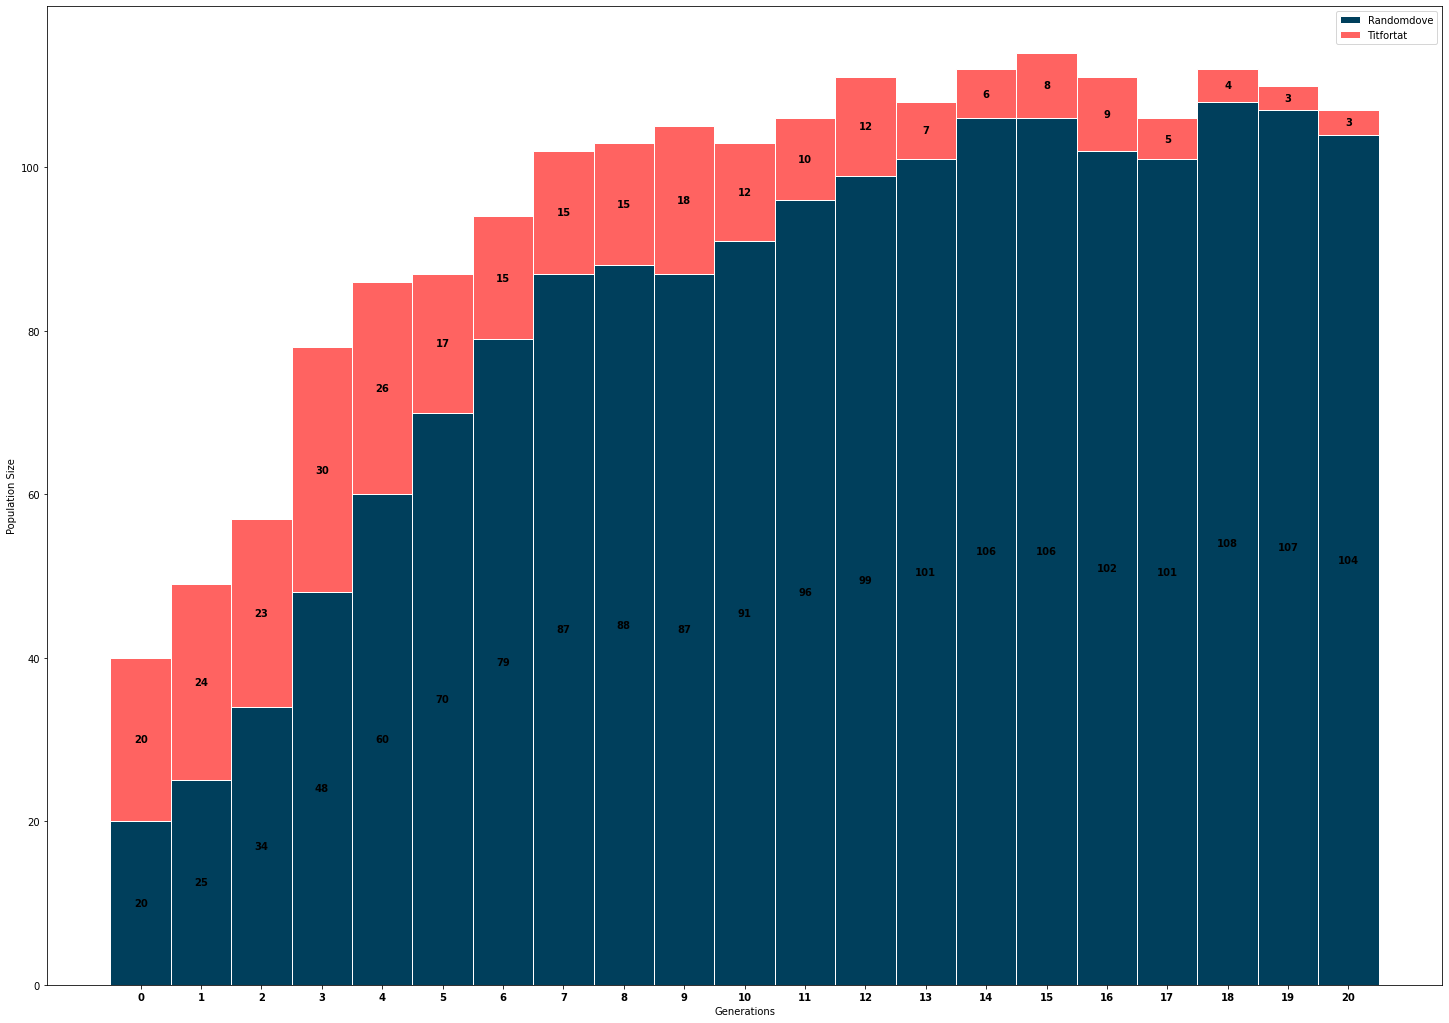

In [ ]:
run_simulation(input11[0], input11[1], input11[2], input11[3], input11[4], input11[5])

**In this assignment, I showed test cases with Hawk and Dove because that's what we discussed in class. I modelled the other strategies out of interest. One can check how the other strategies perform against one another for different cases of resource availability**